In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import json as js

from tensorflow.keras.datasets import imdb


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


max_words_count = 218
train_data_numpy = np.zeros((train_data.shape[0], max_words_count), dtype=int)
for (review_index, review) in enumerate(train_data):
    for (word_index, word) in enumerate(review):
        if word_index == max_words_count:
            break
        train_data_numpy[review_index][word_index] = word


data_table = pd.DataFrame(index=[f"review_{i}" for i in range(train_data.shape[0])],
                          columns=[f"word_{i}" for i in range(len(train_data[0]))],
                          data=train_data_numpy)
data_table["review rate class "] = train_labels

print(data_table)

              word_0  word_1  word_2  word_3  word_4  word_5  word_6  word_7   
review_0           1      14      22      16      43     530     973    1622  \
review_1           1     194    1153     194    8255      78     228       5   
review_2           1      14      47       8      30      31       7       4   
review_3           1       4       2       2      33    2804       4    2040   
review_4           1     249    1323       7      61     113      10      10   
...              ...     ...     ...     ...     ...     ...     ...     ...   
review_24995       1      14       9       6    2758      20      21    1517   
review_24996       1    4679    2784     299       6    1042      37      80   
review_24997       1      11       6     230     245    6401       9       6   
review_24998       1    1446    7079      69      72    3305      13     610   
review_24999       1      17       6     194     337       7       4     204   

              word_8  word_9  ...  word

In [3]:
def vectorize_sequences(sequences, dim=10000):

    result_matrix = np.zeros((len(sequences), dim))
    for (i, sequence) in enumerate(sequences):
        result_matrix[i, sequence] = 1
    
    return result_matrix

train_data_vectorized = vectorize_sequences(train_data)
test_data_vectorized = vectorize_sequences(test_data)

train_labels_vectorized = np.asarray(train_labels, dtype="float32")
test_labels_vectorized = np.asarray(test_labels, dtype="float32")



In [4]:
def build_model(parameters_shape=16):

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(parameters_shape, activation="relu", input_shape=(10000, )))
    model.add(tf.keras.layers.Dense(parameters_shape, activation="relu"))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

    model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])

    return model


In [5]:
train_data_val = train_data_vectorized[:10000]
partial_train_data = train_data_vectorized[10000:]

train_labels_val = train_labels_vectorized[:10000]
partial_train_labels = train_labels_vectorized[10000:]

print(train_data_val, partial_train_data)


[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 0. 0.]] [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [6]:
model = build_model(parameters_shape=16)

history = model.fit(partial_train_data,
                  partial_train_labels,
                  epochs=100,
                  batch_size=512,
                  validation_data=(train_data_val, train_labels_val))

Epoch 1/100
30/30 [==============================] - 2s 36ms/step - loss: 0.5483 - acc: 0.7765 - val_loss: 0.4247 - val_acc: 0.8609
Epoch 2/100
30/30 [==============================] - 1s 21ms/step - loss: 0.3449 - acc: 0.8885 - val_loss: 0.3600 - val_acc: 0.8507
Epoch 3/100
30/30 [==============================] - 1s 20ms/step - loss: 0.2605 - acc: 0.9124 - val_loss: 0.2991 - val_acc: 0.8820
Epoch 4/100
30/30 [==============================] - 1s 20ms/step - loss: 0.2128 - acc: 0.9291 - val_loss: 0.2778 - val_acc: 0.8890
Epoch 5/100
30/30 [==============================] - 1s 21ms/step - loss: 0.1766 - acc: 0.9407 - val_loss: 0.2764 - val_acc: 0.8873
Epoch 6/100
30/30 [==============================] - 1s 20ms/step - loss: 0.1501 - acc: 0.9522 - val_loss: 0.2823 - val_acc: 0.8855
Epoch 7/100
30/30 [==============================] - 1s 20ms/step - loss: 0.1302 - acc: 0.9595 - val_loss: 0.2942 - val_acc: 0.8840
Epoch 8/100
30/30 [==============================] - 1s 20ms/step - loss: 0.

KeyboardInterrupt: 

In [7]:
history_dict = history.history
with open("binary_classificatoin_log.json", "w") as json_file:
    js.dump(history_dict, json_file)


NameError: name 'history' is not defined

C:\Users\1\AppData\Local\Temp\ipykernel_8992\3596096223.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


NameError: name 'history_dict' is not defined

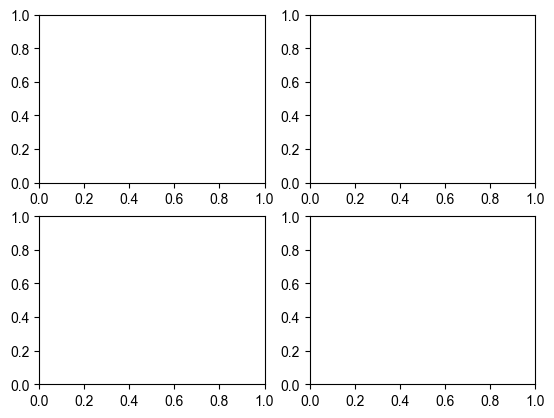

In [8]:
figure, axis = plt.subplots(ncols=2, nrows=2)
plt.style.use("seaborn")

history_loss_values = np.asarray(history_dict["loss"])
history_val_loss_values = np.asarray(history_dict["val_loss"])
history_acc_values = np.asarray(history_dict["acc"])
history_val_acc_values = np.asarray(history_dict["val_acc"])

history_epochs = range(1, len(history_dict["acc"]) + 1)

axis[0, 0].plot(history_epochs, history_loss_values, color="red", linestyle="--", label="loss_values")
axis[0, 0].fill_between(history_epochs, history_loss_values - 0.012, history_loss_values + 0.012, color="green", alpha=0.4)
axis[0, 1].plot(history_epochs, history_val_loss_values, color="green", linestyle="--", label="loss_val_values")
axis[0, 1].fill_between(history_epochs, history_val_loss_values - 0.012, history_val_loss_values + 0.012, color="red", alpha=0.4)

axis[1, 0].plot(history_epochs, history_acc_values, color="red", linestyle="--", label="acc_info")
axis[1, 0].fill_between(history_epochs, history_acc_values - 0.0016, history_acc_values + 0.0016, color="green", alpha=0.4)
axis[1, 1].plot(history_epochs, history_val_acc_values, color="green", linestyle="--", label="acc_val_info")
axis[1, 1].fill_between(history_epochs, history_val_acc_values - 0.0016, history_val_acc_values + 0.0016, color="red", alpha=0.4)

axis[0, 0].legend(loc="upper left")
axis[0, 1].legend(loc="upper left")
axis[1, 0].legend(loc="upper left")
axis[1, 1].legend(loc="upper left")

plt.show()


In [9]:
model_1 = build_model(parameters_shape=512)
history_1 = model_1.fit(partial_train_data, partial_train_labels,
            validation_data=(train_data_val, train_labels_val),
            epochs=100, batch_size=512)

model_2 = build_model(parameters_shape=123)
history_2 = model_2.fit(partial_train_data, partial_train_labels,
            validation_data=(train_data_val, train_labels_val),
            epochs=100, batch_size=512)

model_3 = build_model(parameters_shape=345)
history_3 = model_2.fit(partial_train_data, partial_train_labels,
                        validation_data=(train_data_val, train_labels_val),
                        epochs=100, batch_size=512)

Epoch 1/100
30/30 [==============================] - 4s 111ms/step - loss: 0.5499 - acc: 0.7420 - val_loss: 0.3407 - val_acc: 0.8612
Epoch 2/100
30/30 [==============================] - 3s 96ms/step - loss: 0.3267 - acc: 0.8646 - val_loss: 0.3416 - val_acc: 0.8531
Epoch 3/100
30/30 [==============================] - 3s 98ms/step - loss: 0.2260 - acc: 0.9118 - val_loss: 0.2746 - val_acc: 0.8875
Epoch 4/100
30/30 [==============================] - 3s 97ms/step - loss: 0.1839 - acc: 0.9295 - val_loss: 0.3083 - val_acc: 0.8804
Epoch 5/100
30/30 [==============================] - 3s 95ms/step - loss: 0.1330 - acc: 0.9509 - val_loss: 0.3145 - val_acc: 0.8860
Epoch 6/100
30/30 [==============================] - 3s 98ms/step - loss: 0.1047 - acc: 0.9635 - val_loss: 0.3607 - val_acc: 0.8687
Epoch 7/100
30/30 [==============================] - 3s 102ms/step - loss: 0.0976 - acc: 0.9645 - val_loss: 0.2941 - val_acc: 0.8835
Epoch 8/100
30/30 [==============================] - 3s 99ms/step - loss: 

KeyboardInterrupt: 

C:\Users\1\AppData\Local\Temp\ipykernel_16724\707209992.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


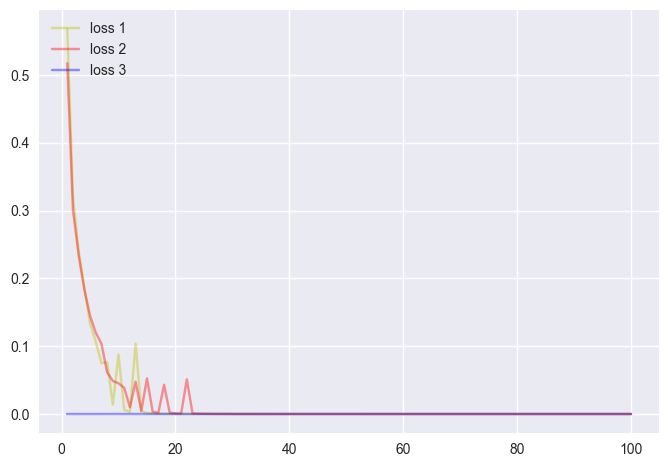

In [ ]:
plt.style.use("seaborn")
fig, axis_1 = plt.subplots()

loss_info_1 = history_1.history["loss"]
loss_info_2 = history_2.history["loss"]
loss_info_3 = history_3.history["loss"]

axis_1.plot(range(1, len(loss_info_1) + 1), loss_info_1, color="y", label="loss 1", alpha=0.4)
axis_1.plot(range(1, len(loss_info_1) + 1), loss_info_2, color="red", label="loss 2", alpha=0.4)
axis_1.plot(range(1, len(loss_info_1) + 1), loss_info_3, color="blue", label="loss 3", alpha=0.4)

axis_1.legend(loc="upper left")
plt.show()


In [28]:
def make_model(reg_mode, reg_rate=0.01):

    ml_model = tf.keras.Sequential()

    if reg_mode:
        
        ml_model.add(tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(reg_rate), activation="relu", input_shape=(10000, )))
        ml_model.add(tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(reg_rate), activation="relu"))
        ml_model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    
    else:

        ml_model.add(tf.keras.layers.Dense(16, activation="relu", input_shape=(10000, )))
        ml_model.add(tf.keras.layers.Dense(16, activation="relu"))
        ml_model.add(tf.keras.layers.Dense(1, activation="sigmoid")) 
    
    ml_model.compile(optimizer="rmsprop",
                     loss="binary_crossentropy",
                     metrics=["acc"])
    return ml_model

def make_dropout_model(dropout_score=0.5, drop_mode=False):

    ml_model = tf.keras.Sequential()
    
    if drop_mode:
        
        ml_model.add(tf.keras.layers.Dense(16, input_shape=(10000, ), activation="relu"))
        ml_model.add(tf.keras.layers.Dropout(dropout_score))
        ml_model.add(tf.keras.layers.Dense(16, activation="relu"))
        ml_model.add(tf.keras.layers.Dropout(dropout_score))
        ml_model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    
    else:

        ml_model.add(tf.keras.layers.Dense(16, activation="relu", input_shape=(10000, )))
        ml_model.add(tf.keras.layers.Dense(16, activation="relu"))
        ml_model.add(tf.keras.layers.Dense(1, activation="sigmoid")) 

    ml_model.compile(optimizer="rmsprop",
                    loss="mse",
                    metrics=["mae"])
                    
    return ml_model


In [11]:
model_Ln2 = make_model(reg_rate=0.01, reg_mode=True)
model_NoneLn= make_model(reg_mode=False, reg_rate=0.01)

history_Ln2 = model_Ln2.fit(partial_train_data, partial_train_labels,
            batch_size=1,
            validation_data=(train_data_val, train_labels_val),
            epochs=30)

history_NoneLn = model_NoneLn.fit(partial_train_data, partial_train_labels,
            validation_data=(train_data_val, train_labels_val),
            batch_size=1,
            epochs=30)



Epoch 1/30
15000/15000 [==============================] - 33s 2ms/step - loss: 0.5340 - acc: 0.7732 - val_loss: 0.5772 - val_acc: 0.7519
Epoch 2/30
15000/15000 [==============================] - 30s 2ms/step - loss: 0.5062 - acc: 0.7877 - val_loss: 0.4929 - val_acc: 0.7928
Epoch 3/30
15000/15000 [==============================] - 33s 2ms/step - loss: 0.4924 - acc: 0.7953 - val_loss: 0.5060 - val_acc: 0.7940
Epoch 4/30
15000/15000 [==============================] - 32s 2ms/step - loss: 0.4916 - acc: 0.7965 - val_loss: 0.4553 - val_acc: 0.8087
Epoch 5/30
15000/15000 [==============================] - 32s 2ms/step - loss: 0.4874 - acc: 0.7941 - val_loss: 0.4662 - val_acc: 0.7970
Epoch 6/30
15000/15000 [==============================] - 32s 2ms/step - loss: 0.4889 - acc: 0.7993 - val_loss: 0.5982 - val_acc: 0.7487
Epoch 7/30
15000/15000 [==============================] - 31s 2ms/step - loss: 0.4911 - acc: 0.7923 - val_loss: 0.4778 - val_acc: 0.8019
Epoch 8/30
15000/15000 [=================

C:\Users\1\AppData\Local\Temp\ipykernel_8992\3879183034.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


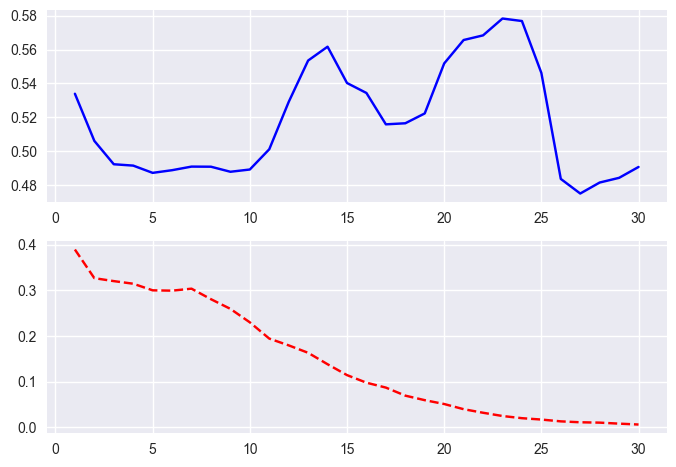

In [18]:
plt.style.use("seaborn")
fig, axises = plt.subplots(nrows=2)

loss_vector_l2 = np.array(history_Ln2.history["loss"])
loss_vector = np.array(history_NoneLn.history["loss"])
loss = [loss_vector_l2, loss_vector]
color = ["blue", "red"]
linestyles = [None, "--"]

for sample in range(2):
    axises[sample].plot(range(1, loss[sample].shape[0] + 1), loss[sample], color=color[sample], linestyle=linestyles[sample])
plt.show()



In [30]:
model_drop = make_dropout_model(drop_mode=True, dropout_score=0.5)
model_NoneDrop = make_dropout_model(drop_mode=False)

history_dropout = model_drop.fit(partial_train_data, partial_train_labels,
                                verbose=0,
                                batch_size=1)
history_NoneDropout = model_NoneDrop.fit(partial_train_data, partial_train_labels,
                                    verbose=0,
                                    batch_size=1)


KeyboardInterrupt: 